In [21]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

# Datos

In [2]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)

# Primera Explortación

In [4]:
df = data.copy()

In [5]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Mini EDA

In [18]:
df.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [7]:
df.describe(include="all")

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [13]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

/var/folders/dk/y0lym97s13g52x50m8y8qycc0000gn/T/ipykernel_6817/2802618981.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='bright')


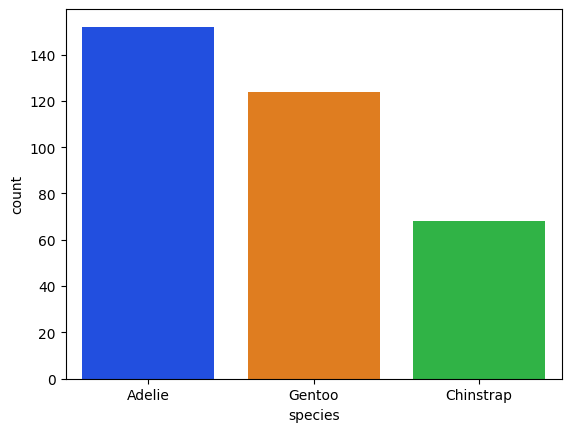

In [14]:
sns.countplot(x='species', data=df, palette='bright')

plt.show()

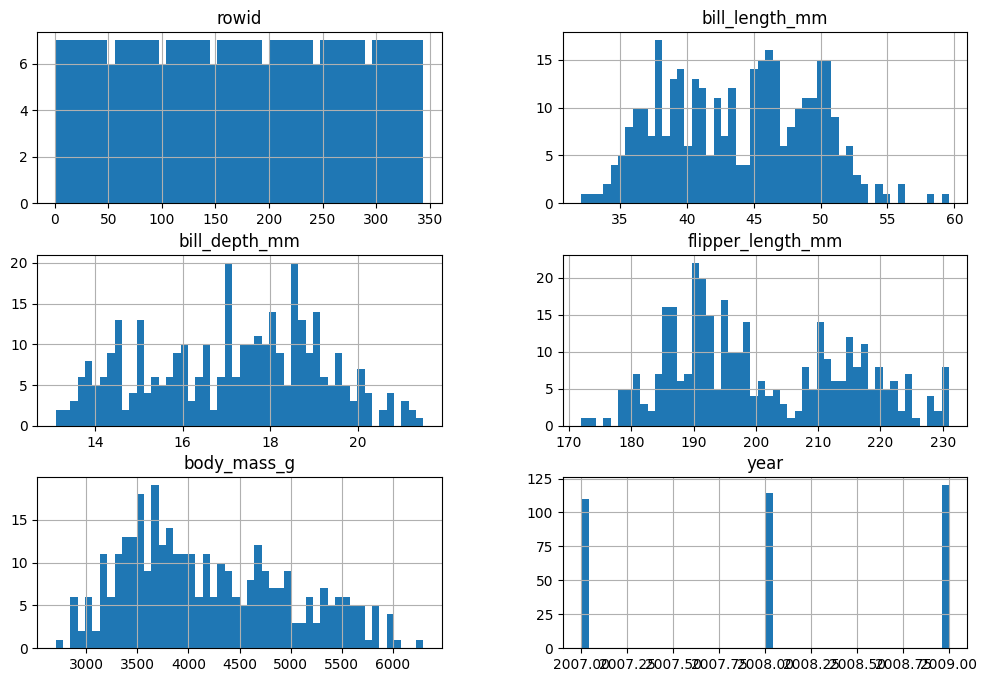

In [8]:
df.hist(bins=50, figsize=(12,8))
plt.show()

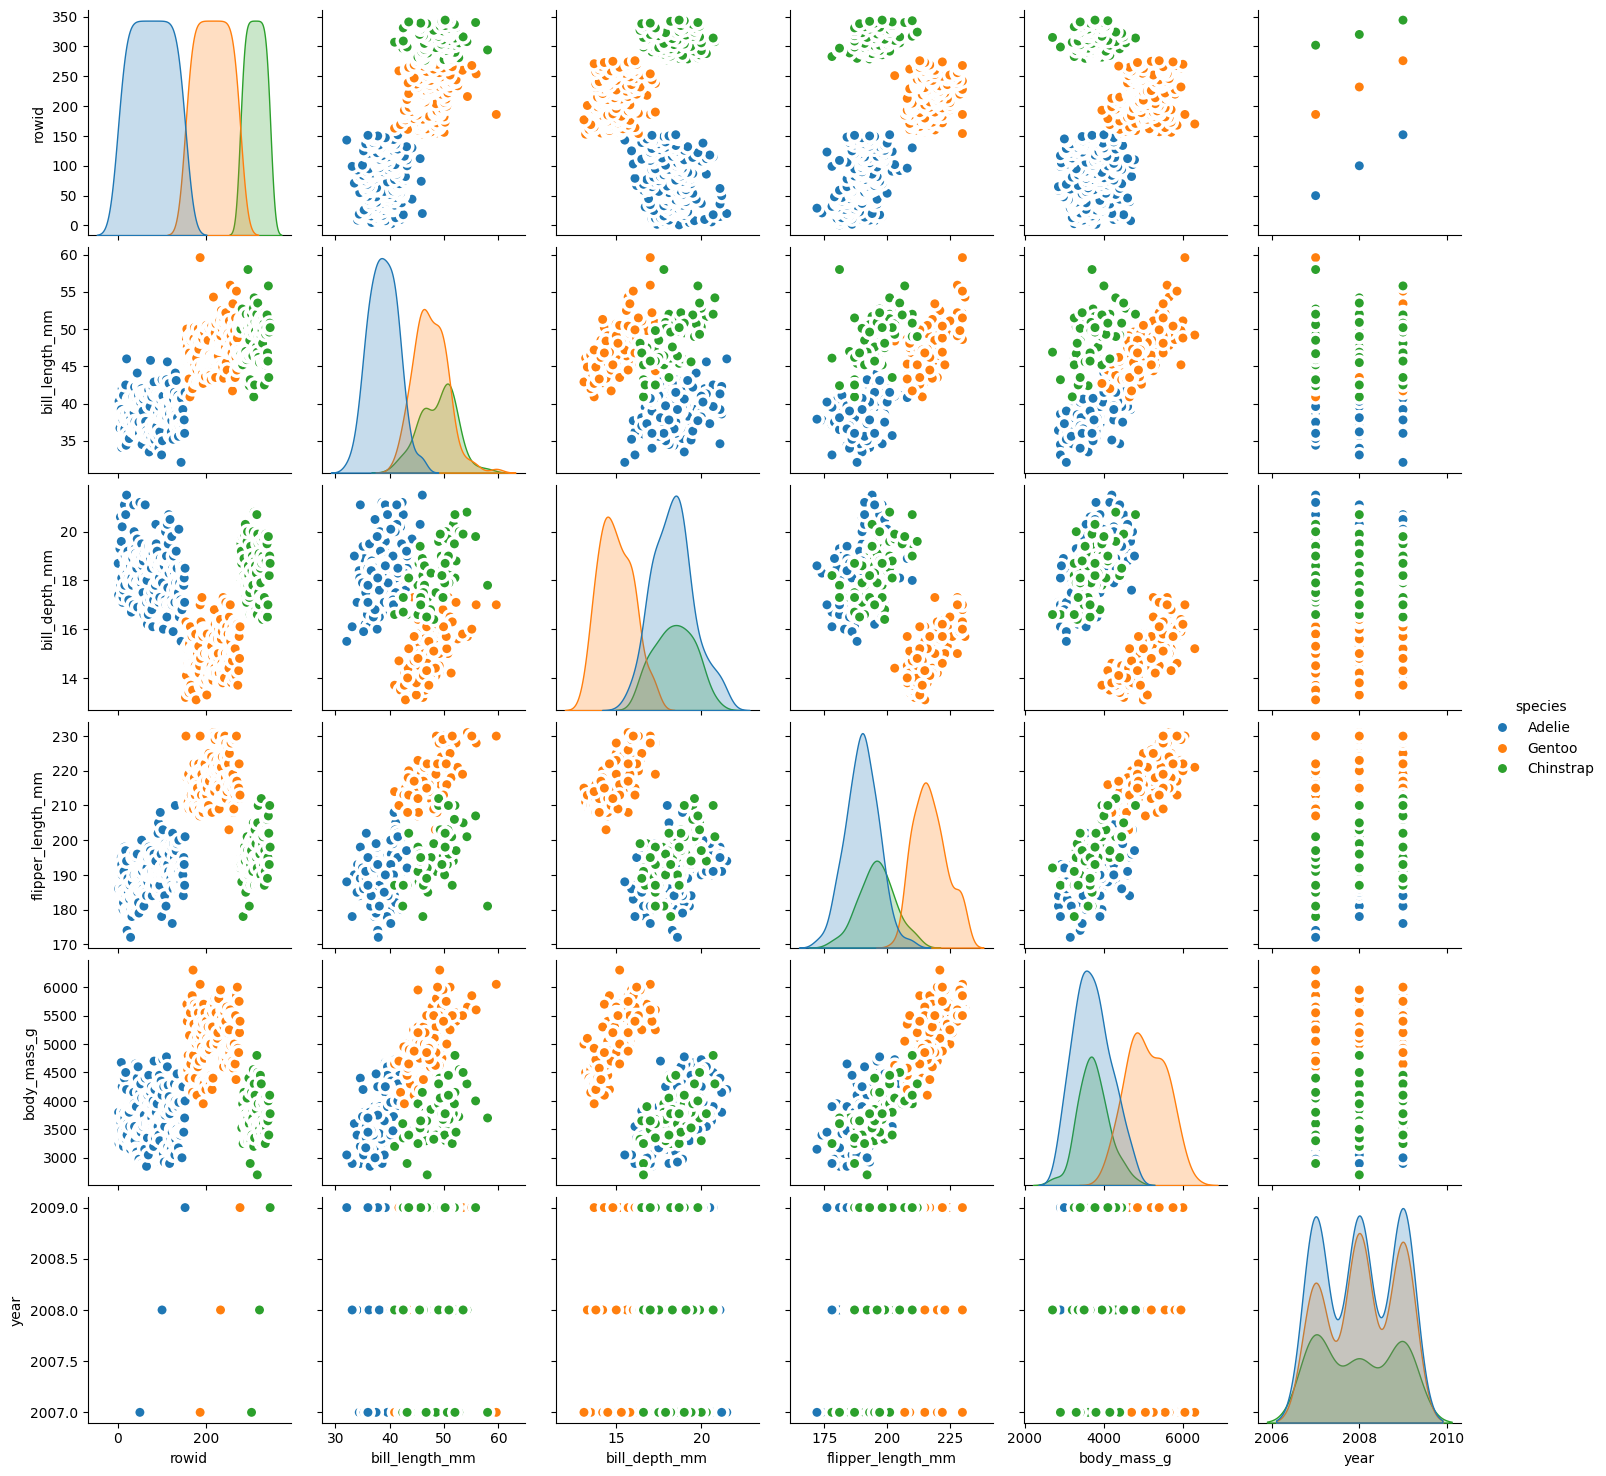

In [11]:
sns.pairplot(df, kind='scatter', hue='species',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

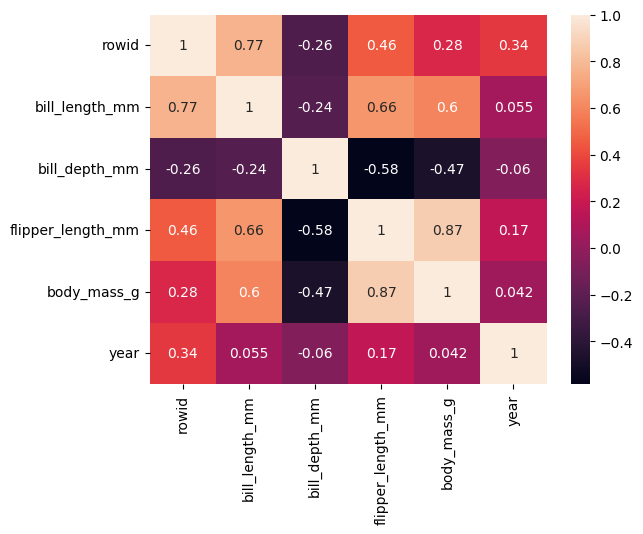

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [ ]:
sns.countplot(x='island', hue= 'species')

# Tratamiento de datos

In [15]:
df['sex'].replace('.',np.nan,inplace=True)

In [ ]:
df

In [20]:
datos_imp = df.groupby(['species','sex','island'])[['rowid','bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']].aggregate(
    {'rowid':'median','bill_length_mm':'median', 'bill_depth_mm':'median','flipper_length_mm':'median','body_mass_g':'median'}).reset_index()
datos_imp

,species,sex,island,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,female,Biscoe,62.0,37.75,17.70,187.0,3375.0
1,Adelie,female,Dream,93.0,36.80,17.80,188.0,3400.0
2,Adelie,female,Torgersen,76.0,37.60,17.45,189.0,3400.0
3,Adelie,male,Biscoe,63.0,40.80,18.90,191.0,4000.0
4,Adelie,male,Dream,93.0,40.25,18.65,190.5,3987.5
5,Adelie,male,Torgersen,78.0,41.10,19.20,195.0,4000.0
6,Chinstrap,female,Dream,310.5,46.30,17.65,192.0,3550.0
7,Chinstrap,male,Dream,310.5,50.95,19.30,200.5,3950.0
8,Gentoo,female,Biscoe,212.0,45.50,14.25,212.0,4700.0
9,Gentoo,male,Biscoe,214.0,49.50,15.70,221.0,5500.0


# División de Datos

In [22]:
columnas_categoricas = ['sex', 'island']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, columnas_categoricas)], remainder='passthrough')

# Separar características y etiquetas
X = df.drop(['species'], axis=1)
y = df['species']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo dentro de un pipeline
modelo = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(random_state=42))])

modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred)}")

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Escalado

# BaseLines y Selección del Modelo

# Predicción 

# Validar mi Modelo